<h1> Spotify API </h1>

In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [ ]:
client_secret = '3144ab0c08a4414a8d2dba8cf9be2999'
client_id = 'b3c21e406dc94f05a3c756b4f6f946a3'

In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials


client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# Use the Spotify API
user_id = 'scarlettcassidy'
user_top_tracks = sp.user_playlists(user_id)
for idx, track in enumerate(user_top_tracks['items']):
    track_name = track['name']
    track_artists = ", ".join([artist['name'] for artist in track.get('artists', [])])
    print(f"{idx+1}. {track_name} by {track_artists}")

<h1>Get a list of youtube URLS to download</h1>

AttributeError: module 'librosa.display' has no attribute 'waveplot'

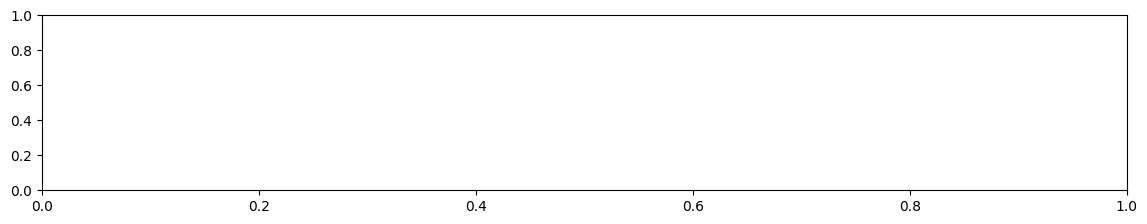

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [2]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load the audio file
audio_file = '/users/seanmullins333/desktop/scotty.mp3'
y, sr = librosa.load(audio_file)

# Extract the vocals and instrumentals
vocals, instrumentals = librosa.effects.hpss(y)

# Plot the waveform of vocals and instrumentals
plt.figure(figsize=(14, 5))

plt.subplot(2, 1, 1)
librosa.display.waveplot(vocals, sr=sr)
plt.title('Vocals')

plt.subplot(2, 1, 2)
librosa.display.waveplot(instrumentals, sr=sr)
plt.title('Instrumentals')

plt.tight_layout()
plt.show()


In [11]:
import pytube
import os

from pytube import YouTube
from pytube.exceptions import VideoUnavailable

import ssl
import urllib.request

# Create a custom SSL context
ssl_context = ssl.create_default_context()
ssl_context.check_hostname = False
ssl_context.verify_mode = ssl.CERT_NONE

ssl._create_default_https_context = ssl._create_unverified_context



playlist_url = "https://www.youtube.com/playlist?list=PLrl4xJK5PokJkobGxk38nvpwaYDazRmqh"
playlist = pytube.Playlist(playlist_url)

video_links = playlist.video_urls


    
for i in video_links:
    try:
        # YouTube video URL
        url = i

        # Creating a YouTube object
        yt = pytube.YouTube(url)

        # Selecting the first audio stream
        stream = yt.streams.filter(only_audio=True).first()

        # Setting the output file name
        # output_file = os.path.join(os.path.dirname(os.path.abspath(__file__)), "audio.mp3")
        output_file = 'Uzi Vert'
        # Downloading the audio stream
        stream.download(output_path=output_file)

        print("Audio downloaded successfully!")
    except VideoUnavailable:
        print("The video is unavailable.")
    except Exception as e:
        print("An error occurred: ", e)
        
import os


for filename in os.listdir(output_file):
    if filename.endswith(".mp4"):
        os.rename(os.path.join(output_file, filename), os.path.join(output_file, filename[:-4] + ".wav"))

<h1> Get my final JSON to process in a ML model </h1>

In [133]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

final_json = {'Artist': [],
             'MFCCs': [],
              'Spec_Con': [],
              'Label': []}

n_mfcc = 40

def extract_mfccs(folder_path, artist, label):

    folder_path = folder_path

    for file_name in os.listdir(folder_path):
        try:
            file_path = os.path.join(folder_path, file_name)
            y, sr = librosa.load(file_path, sr=None, duration=100, offset=30, mono=False)

            mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
            sc = librosa.feature.spectral_contrast(y=y, sr=sr)  

            
            final_json['MFCCs'].append(mfccs)
            final_json['Spec_Con'].append(sc)
            final_json['Artist'].append(artist)
            final_json['Label'].append(label)
        except:
            print('Error with {}'.format(file_path))
            
            

extract_mfccs('/users/Seanmullins333/desktop/AAA/Drake', 'Drake', 0)
extract_mfccs('/users/Seanmullins333/desktop/AAA/Posty', 'Posty', 1)
extract_mfccs('/users/Seanmullins333/desktop/AAA/Weekend', 'Weekend', 2)
extract_mfccs('/users/Seanmullins333/desktop/AAA/SZA', 'SZA', 3)
extract_mfccs('/users/Seanmullins333/desktop/AAA/Taylor', 'Taylor', 4)
extract_mfccs('/users/Seanmullins333/desktop/AAA/Kanye', 'Kanye', 5)
extract_mfccs('/users/Seanmullins333/desktop/AAA/Juice', 'Juice', 6)
extract_mfccs('/users/Seanmullins333/desktop/AAA/Travis Scott', 'Travis Scott', 7)
extract_mfccs('/users/Seanmullins333/desktop/AAA/Uzi Vert', 'Uzi Vert', 8)



/var/folders/v8/l9k84q0j5dvb69nc7wjtd5x80000gn/T/ipykernel_83942/1337408742.py:21: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=None, duration=100, offset=30, mono=False)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Error with /users/Seanmullins333/desktop/AAA/Posty/.DS_Store


/var/folders/v8/l9k84q0j5dvb69nc7wjtd5x80000gn/T/ipykernel_83942/1337408742.py:21: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=None, duration=100, offset=30, mono=False)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Error with /users/Seanmullins333/desktop/AAA/Weekend/.DS_Store


/var/folders/v8/l9k84q0j5dvb69nc7wjtd5x80000gn/T/ipykernel_83942/1337408742.py:21: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=None, duration=100, offset=30, mono=False)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=0
  warnings.warn(


Error with /users/Seanmullins333/desktop/AAA/Kanye/.DS_Store


/var/folders/v8/l9k84q0j5dvb69nc7wjtd5x80000gn/T/ipykernel_83942/1337408742.py:21: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=None, duration=100, offset=30, mono=False)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Error with /users/Seanmullins333/desktop/AAA/Uzi Vert/Bigger Than Life.wav


<h1> Let's now break the data into X and Y dataframes to get ready for processing. We are basically taking the mean and variance for each MFCC and using those as features. </h1>

In [127]:
# Calculate the mean and variance for each inner array
mean_list = []
variance_list = []

for inner_array in final_json['MFCCs']:
    for in_array in inner_array:
        mean_list.append(np.mean(in_array))
        variance_list.append(np.var(in_array))

num_columns = 40
reshaped_array_mean = np.array(mean_list).reshape(-1, num_columns)
reshaped_array_var = np.array(variance_list).reshape(-1, num_columns)

mfcc_df_mean = pd.DataFrame(reshaped_array_mean)
mfcc_df_var = pd.DataFrame(reshaped_array_var)

sc_df = pd.DataFrame([np.mean(inner_array, axis=1) for inner_array in final_json['Spec_Con']])
    
label_df = pd.DataFrame(final_json['Label'])

mfcc_df = mfcc_df_mean.merge(mfcc_df_var, how='left', left_index=True, right_index=True)

mfcc_df = mfcc_df.merge(sc_df, how='left', left_index=True, right_index=True)

new_column_names = ['Column' + str(i+1) for i in range(len(mfcc_df.columns))]

mfcc_df.columns = new_column_names

<h1> Let's try a KNN model first </h1>

In [120]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(mfcc_df, label_df, test_size=0.3)

x_sc = StandardScaler()
X_train = x_sc.fit_transform(X_train)
X_test = x_sc.transform(X_test)

k = 11

distance_metric = 'euclidean'

knn = KNeighborsClassifier(n_neighbors=k  , metric=distance_metric)
knn.fit(X_train, y_train)

# Use the trained KNN model to predict the class of the test set
y_pred = knn.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_pred, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.5333333333333333


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


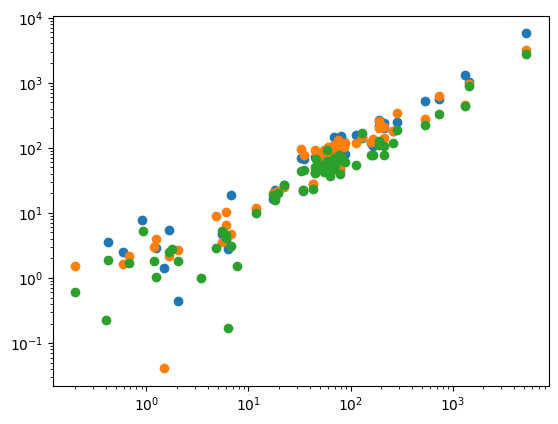

In [220]:
y1 = mfcc_df.iloc[4].transpose()
y2 = mfcc_df.iloc[74].transpose()
y3 = mfcc_df.iloc[104].transpose()
x = mfcc_df.iloc[5].transpose()

plt.scatter(x, y1)
plt.scatter(x, y2)
plt.scatter(x, y3)
plt.yscale('log')
plt.xscale('log')

<h1> Okay this is pretty good... Near 80% - 85% consistently. Now Lets tune hyperparams and try to optimize K. </h1>

Text(0, 0.5, 'Accuracy')

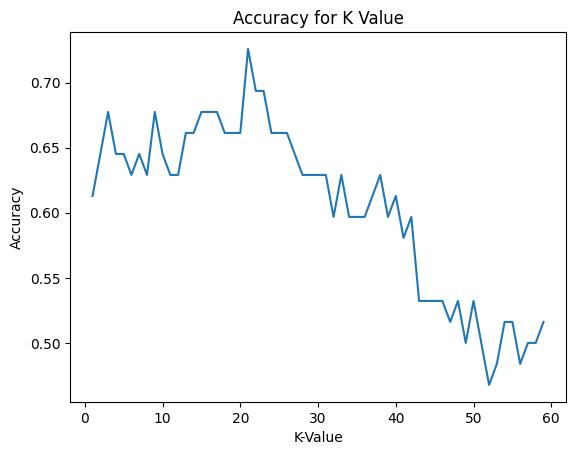

In [156]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

error = []

X_train, X_test, y_train, y_test = train_test_split(mfcc_df, label_df, test_size=0.3)

for i in range(1,60):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error.append(accuracy_score(y_pred, y_test))
    
plt.plot(range(1,60), error)
plt.title('Accuracy for K Value')
plt.xlabel('K-Value')
plt.ylabel('Accuracy')

<h1> Let's continue with MFCC and see if Spectral Centroids can add some separation </h1> 

In [283]:
y_drake, sr_drake = librosa.load('/users/seanmullins333/desktop/AAA/Drake/Energy.wav')
y_posty, sr_posty = librosa.load('/users/seanmullins333/desktop/AAA/Posty/Circles.wav')
y_posty2, sr_posty2 = librosa.load('/users/seanmullins333/desktop/AAA/Posty/Candy Paint.wav')

y_weekend, sr_weekend = librosa.load('/users/seanmullins333/desktop/AAA/Weekend/Outside.wav')

sc_drake = librosa.feature.spectral_centroid(y=y_drake, sr=sr_drake)[0][0:5000]
sc_posty = librosa.feature.spectral_centroid(y=y_posty, sr=sr_posty)[0][0:5000]
sc_posty2 = librosa.feature.spectral_centroid(y=y_posty2, sr=sr_posty2)[0][0:5000]
sc_weekend = librosa.feature.spectral_centroid(y=y_weekend, sr=sr_weekend)[0][0:5000]

sc_drake_roll = pd.Series(sc_drake).rolling(window=500).mean()
sc_posty_roll = pd.Series(sc_posty).rolling(window=500).mean()
sc_posty_roll2 = pd.Series(sc_posty2).rolling(window=500).mean()
sc_weekend_roll = pd.Series(sc_weekend).rolling(window=500).mean()

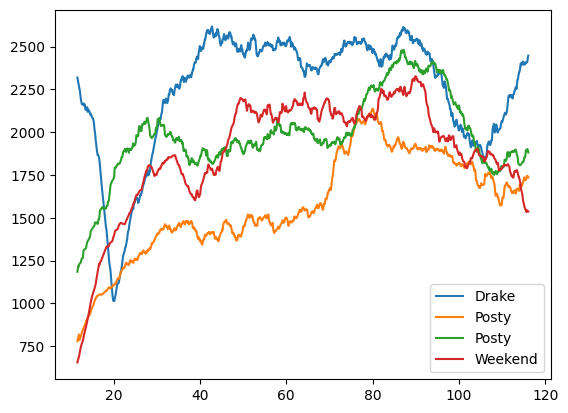

In [284]:
frames = range(len(sc_drake))
t = librosa.frames_to_time(frames)

plt.plot(t, sc_drake_roll, label='Drake')
plt.plot(t, sc_posty_roll, label='Posty')
plt.plot(t, sc_posty_roll2, label='Posty')
plt.plot(t, sc_weekend_roll, label='Weekend')

plt.legend()

<h1> Spectral Centriods can't really add value right now. Its possible that when we seperate vocals, we can get something more accurate, but feeding full songs makes it too dependant on the intrumental.  </h1>

<h1> Let's try something like a SVM </h1>

In [132]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

model = SVC(kernel='rbf', C=1, probability=True)

X_train, X_test, y_train, y_test = train_test_split(mfcc_df, label_df, test_size=0.3)

x_sc = StandardScaler()
X_train = x_sc.fit_transform(X_train)
X_test = x_sc.transform(X_test)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy_score(y_pred, y_test)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.68

In [34]:
pd.DataFrame(model.predict_proba(X_test))

0         1         2         3         4         5         6   
0    0.011943  0.027435  0.352533  0.319451  0.012400  0.008869  0.093435  \
1    0.024043  0.014096  0.012809  0.009840  0.009093  0.027386  0.041813   
2    0.004051  0.934994  0.004188  0.001474  0.002039  0.004499  0.024834   
3    0.752454  0.001093  0.003435  0.005580  0.003653  0.030831  0.009292   
4    0.012573  0.015681  0.237741  0.338040  0.010919  0.011284  0.134520   
..        ...       ...       ...       ...       ...       ...       ...   
145  0.007992  0.011748  0.032671  0.015835  0.045904  0.837699  0.006906   
146  0.131781  0.029614  0.008823  0.016320  0.003688  0.006046  0.191244   
147  0.802829  0.005657  0.001124  0.003693  0.002890  0.004941  0.011985   
148  0.010001  0.107891  0.273310  0.016262  0.036553  0.484858  0.056343   
149  0.220423  0.012047  0.053939  0.017726  0.012624  0.031936  0.105362   

            7         8  
0    0.156811  0.017124  
1    0.043130  0.817791  
2    0.005687  0.018234  
3    0.132544  0.061116  
4    0.208868  0.030374  
..        ...       ...  
145  0.034798  0.006445  
146  0.358477  0.254006  
147  0.119773  0.047109  
148  0.011044  0.003737  
149  0.511083  0.034860  

[150 rows x 9 columns]

In [31]:
import pickle

# Assuming you have a trained scaler object named 'scaler'
# Save the scaler to a file using pickle
with open('SVM-Model', 'wb') as file:
    pickle.dump(model, file)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/uti

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/uti

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0, 0.5, 'Accuracy')

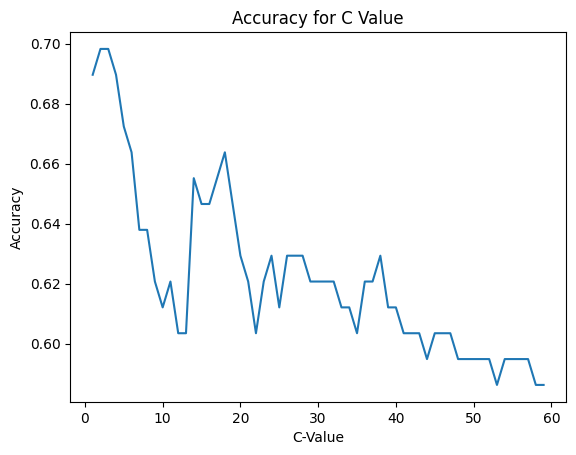

In [18]:
error = []

for i in range(1,60):
    model = SVC(kernel='sigmoid', C=i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    error.append(accuracy_score(y_pred, y_test))
    
plt.plot(range(1,60), error)
plt.title('Accuracy for C Value')
plt.xlabel('C-Value')
plt.ylabel('Accuracy')

<h1> Let's look at the probability distributions to see if we can impliment outlier detection based on the model's uncertaintly of a classification </h1>

In [42]:
pd.set_option('display.max_rows', None)

y_pred_df = pd.DataFrame(model.predict_proba(X_test))

y_pred_df = y_pred_df.merge(pd.DataFrame(y_pred), how='left', left_index=True, right_index=True)

y_pred_df = y_pred_df.merge(y_test.reset_index().iloc[:,1:], how='left', left_index=True, right_index=True)

y_pred_df['Outcome'] = y_pred_df.iloc[:,-2] == y_pred_df.iloc[:,-1]


In [53]:
y_pred_df.iloc[2,0:8].max()

0.9349943750329666

<h1> If no single probability is over 50% then we should not classify. It should be labeled as an outlier as line items with no point over 50% are misclassified. Maybe there is a feature on it (two artists).  </h1>

<h1> 90% is good, but lets try one more model and see if Random Forests is better </h1>

In [166]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

X_train, X_test, y_train, y_test = train_test_split(mfcc_df, label_df, test_size=0.3)

x_sc = StandardScaler()
X_train = x_sc.fit_transform(X_train)
X_test = x_sc.transform(X_test)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy_score(y_pred, y_test)

/var/folders/v8/l9k84q0j5dvb69nc7wjtd5x80000gn/T/ipykernel_92314/4212056833.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


0.7931034482758621

Text(0, 0.5, 'Accuracy')

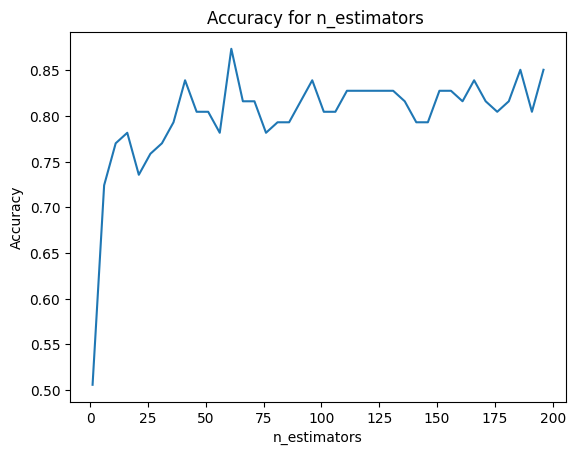

In [177]:
import warnings

warnings.filterwarnings('ignore')

n_estimators = range(1,200,5)

error = []

for i in n_estimators:
    rf = RandomForestClassifier(n_estimators=i)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    error.append(accuracy_score(y_pred, y_test))
    
plt.plot(n_estimators, error)
plt.title('Accuracy for n_estimators ')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')

<h1> Okay, RF was good but not as accurate as SVM. Let's aggregate findings into a plot, also let's test subsets of the data to see if there are parts that train better. </h1>

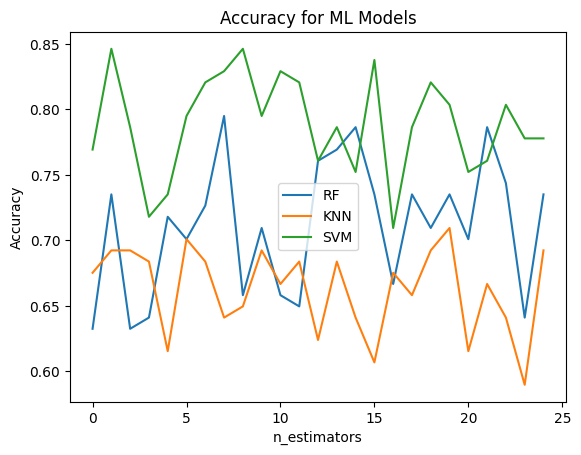

In [276]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

rf_list = []
knn_list = []
svm_list = []

for i in range(25):
    X_train, X_test, y_train, y_test = train_test_split(mfcc_df, label_df, test_size=0.3)
    x_sc = StandardScaler()
    X_train = x_sc.fit_transform(X_train)
    X_test = x_sc.transform(X_test)
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    acc_rf = accuracy_score(y_pred_rf, y_test)
    rf_list.append(acc_rf)


    X_train, X_test, y_train, y_test = train_test_split(mfcc_df, label_df, test_size=0.3)
    x_sc = StandardScaler()
    X_train = x_sc.fit_transform(X_train)
    X_test = x_sc.transform(X_test)
    knn = KNeighborsClassifier(n_neighbors=11, metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred_kn = knn.predict(X_test)
    acc_kn = accuracy_score(y_pred_kn, y_test)
    knn_list.append(acc_kn)


    X_train, X_test, y_train, y_test = train_test_split(mfcc_df, label_df, test_size=0.3)
    x_sc = StandardScaler()
    X_train = x_sc.fit_transform(X_train)
    X_test = x_sc.transform(X_test)
    svm = SVC(kernel='rbf', C=1, probability=True)
    svm.fit(X_train, y_train)
    y_pred_svm = svm.predict(X_test)
    acc_svm = accuracy_score(y_pred_svm, y_test)
    svm_list.append(acc_svm)

ml_df = pd.DataFrame({'RF': rf_list, 'KNN': knn_list, 'SVM': svm_list})
plt.plot(range(25), ml_df)
plt.title('Accuracy for ML Models')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.legend(ml_df.columns)
plt.show()


<h1> No real subset performs better, and we have exhausted feature extraction for now...The next step will be to separate the vocals and rerun the SVM Model</h1>

<h1> Let's try a basic Neural Network to see if classification is better </h1>

In [12]:
import tensorflow as tf
from tensorflow import keras
import numpy
import librosa
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.optimizers import Adam

opt_1 = Adam(learning_rate=.001)

In [69]:
model = keras.Sequential([
    keras.layers.Input(shape=(87,)),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=128, activation='sigmoid'),
    keras.layers.Dense(9, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']
             
             )

X_train, X_test, y_train, y_test = train_test_split(mfcc_df, label_df, test_size=0.3)


x_sc = StandardScaler()
X_train = x_sc.fit_transform(X_train)
X_test = x_sc.transform(X_test)

In [71]:
model.fit(X_train, y_train, epochs=25, batch_size=100)

Epoch 1/25
4/4 [==============================] - 0s 3ms/step - loss: 0.9678 - accuracy: 0.7787
Epoch 2/25
4/4 [==============================] - 0s 3ms/step - loss: 0.8665 - accuracy: 0.7989
Epoch 3/25
4/4 [==============================] - 0s 4ms/step - loss: 0.7708 - accuracy: 0.8218
Epoch 4/25
4/4 [==============================] - 0s 4ms/step - loss: 0.6882 - accuracy: 0.8506
Epoch 5/25
4/4 [==============================] - 0s 3ms/step - loss: 0.6117 - accuracy: 0.8879
Epoch 6/25
4/4 [==============================] - 0s 4ms/step - loss: 0.5435 - accuracy: 0.8937
Epoch 7/25
4/4 [==============================] - 0s 3ms/step - loss: 0.4828 - accuracy: 0.9109
Epoch 8/25
4/4 [==============================] - 0s 3ms/step - loss: 0.4272 - accuracy: 0.9253
Epoch 9/25
4/4 [==============================] - 0s 3ms/step - loss: 0.3784 - accuracy: 0.9454
Epoch 10/25
4/4 [==============================] - 0s 3ms/step - loss: 0.3350 - accuracy: 0.9598
Epoch 11/25
4/4 [======================

In [50]:
tf_proba = pd.DataFrame(np.round(model.predict(X_test) * 100, decimals=2))

tf_proba.merge(y_test.reset_index().iloc[:,1:],how='left',
              left_index=True, right_index=True)

5/5 [==============================] - 0s 1ms/step


0_x          1     2      3          4          5          6   
0     0.000000   0.000000  0.03   0.57  98.959999   0.170000   0.010000  \
1     0.000000   0.000000  0.00   0.00   0.000000   0.000000   0.000000   
2     0.000000   2.870000  3.60  68.18   0.330000  24.520000   0.120000   
3     0.000000   0.000000  0.00   0.00   0.000000   0.000000   0.000000   
4     0.000000  99.970001  0.00   0.00   0.000000   0.000000   0.030000   
..         ...        ...   ...    ...        ...        ...        ...   
145   0.080000   0.010000  0.00   0.00   0.000000   0.000000   0.010000   
146   0.000000  32.549999  0.00   0.01   0.010000   0.930000  58.119999   
147   0.000000   0.000000  0.01   0.37  99.589996   0.010000   0.000000   
148   0.000000   0.000000  0.00   0.02   0.040000  99.940002   0.000000   
149  67.889999   0.000000  0.00   0.00   0.000000   0.000000   0.000000   

             7          8  0_y  
0     0.260000   0.000000    4  
1     0.010000  99.989998    8  
2     0.390000   0.000000    5  
3    99.989998   0.010000    7  
4     0.000000   0.000000    1  
..         ...        ...  ...  
145   1.020000  98.879997    8  
146   8.370000   0.000000    6  
147   0.010000   0.000000    3  
148   0.000000   0.000000    5  
149  31.799999   0.310000    0  

[150 rows x 10 columns]

In [73]:
loss, accuracy = model.evaluate(X_test, y_test)

# Print the accuracy
print('Test Accuracy: {:.2f}%'.format(accuracy * 100))

5/5 [==============================] - 0s 2ms/step - loss: 1.0537 - accuracy: 0.6467
Test Accuracy: 64.67%
